# Projeto 2 - Análise de Dados de RH (Recursos Humanos)

![Logo de capa](Projeto2-Logo.png)

Autor: Leonardo Simões

---
## Sumário
- [1.Introdução](#introduction)
- [2.Objetivos](#objectives)
- [3.Desenvolvimento](#development)
- [4.Conclusão](#conclusion)
- [Referências](#references)

---
<a id='introduction'></a>
## 1. Introdução
Neste projeto faremos uma sequência completa de análise descritiva, diagnóstica e estatística de dados de RH (Recursos Humanos). Usaremos dados reais disponíveis publicamente e aplicaremos diversas técnicas de análise de dados.

A empresa quer saber quais desses candidatos realmente querem trabalhar para a empresa após o treinamento ou estão apenas fazendo um treinamento para retornarem ao mercado à procura de um novo emprego.

O objetivo é contratar os profissionais com perfil adequado, a fim de reduzir o custo e o tempo de contratação, bem como a qualidade do treinamento ou planejamento dos cursos e categorização dos candidatos.

Informações relacionadas a dados demográficos, educação e experiência estão disponíveis no conjunto de dados fornecido.

---
<a id='objectives'></a>
## 2. Objetivos


Nosso objetivo será realizar um extenso trabalho de análise nos dados, compreender como estão organizados, realizar limpeza e transformação dos dados conforme necessário, detectar eventuais padrões e diagnósticos e ao final emitir um parecer com um resumo sobre os dados.

---
<a id='development'></a>
## 3. Desenvolvimento

---
<a id='imports'></a>
### 3.1 Preparação do Ambiente

In [1]:
# Verificação da versão do Python
from platform import python_version
print('Versão do Python: ', python_version())

Versão do Python:  3.11.2


In [3]:
# Imports das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import scipy
from scipy.stats import normaltest

import missingno

In [6]:
# Versões da biblioteca pandas
print('Numpy versão ' + np.__version__)
print('Pandas versão ' + pd.__version__)
print('Seaborn versão ' + sns.__version__)
print('Missingno versão ' + missingno.__version__)

Numpy versão 1.23.5
Pandas versão 1.5.3
Seaborn versão 0.12.2
Missingno versão 0.5.2


In [7]:
# Carrega o conjunto de dados e exibe as primeiras linhas
df = pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [8]:
# Exibe as dimesões do dataframe
df.shape

(19158, 14)

In [9]:
df.columns.values

array(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'], dtype=object)

In [10]:
# Exibe algumas informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [11]:
# Descreve numericamente o dataframe
df.drop(columns = ['enrollee_id', 'target']).describe()

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


In [12]:
# Descrevendo os dados não numéricos
df.describe(exclude = [int, float])

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [13]:
sns.color_palette("crest", as_cmap=True)
sns.set_palette("flare")

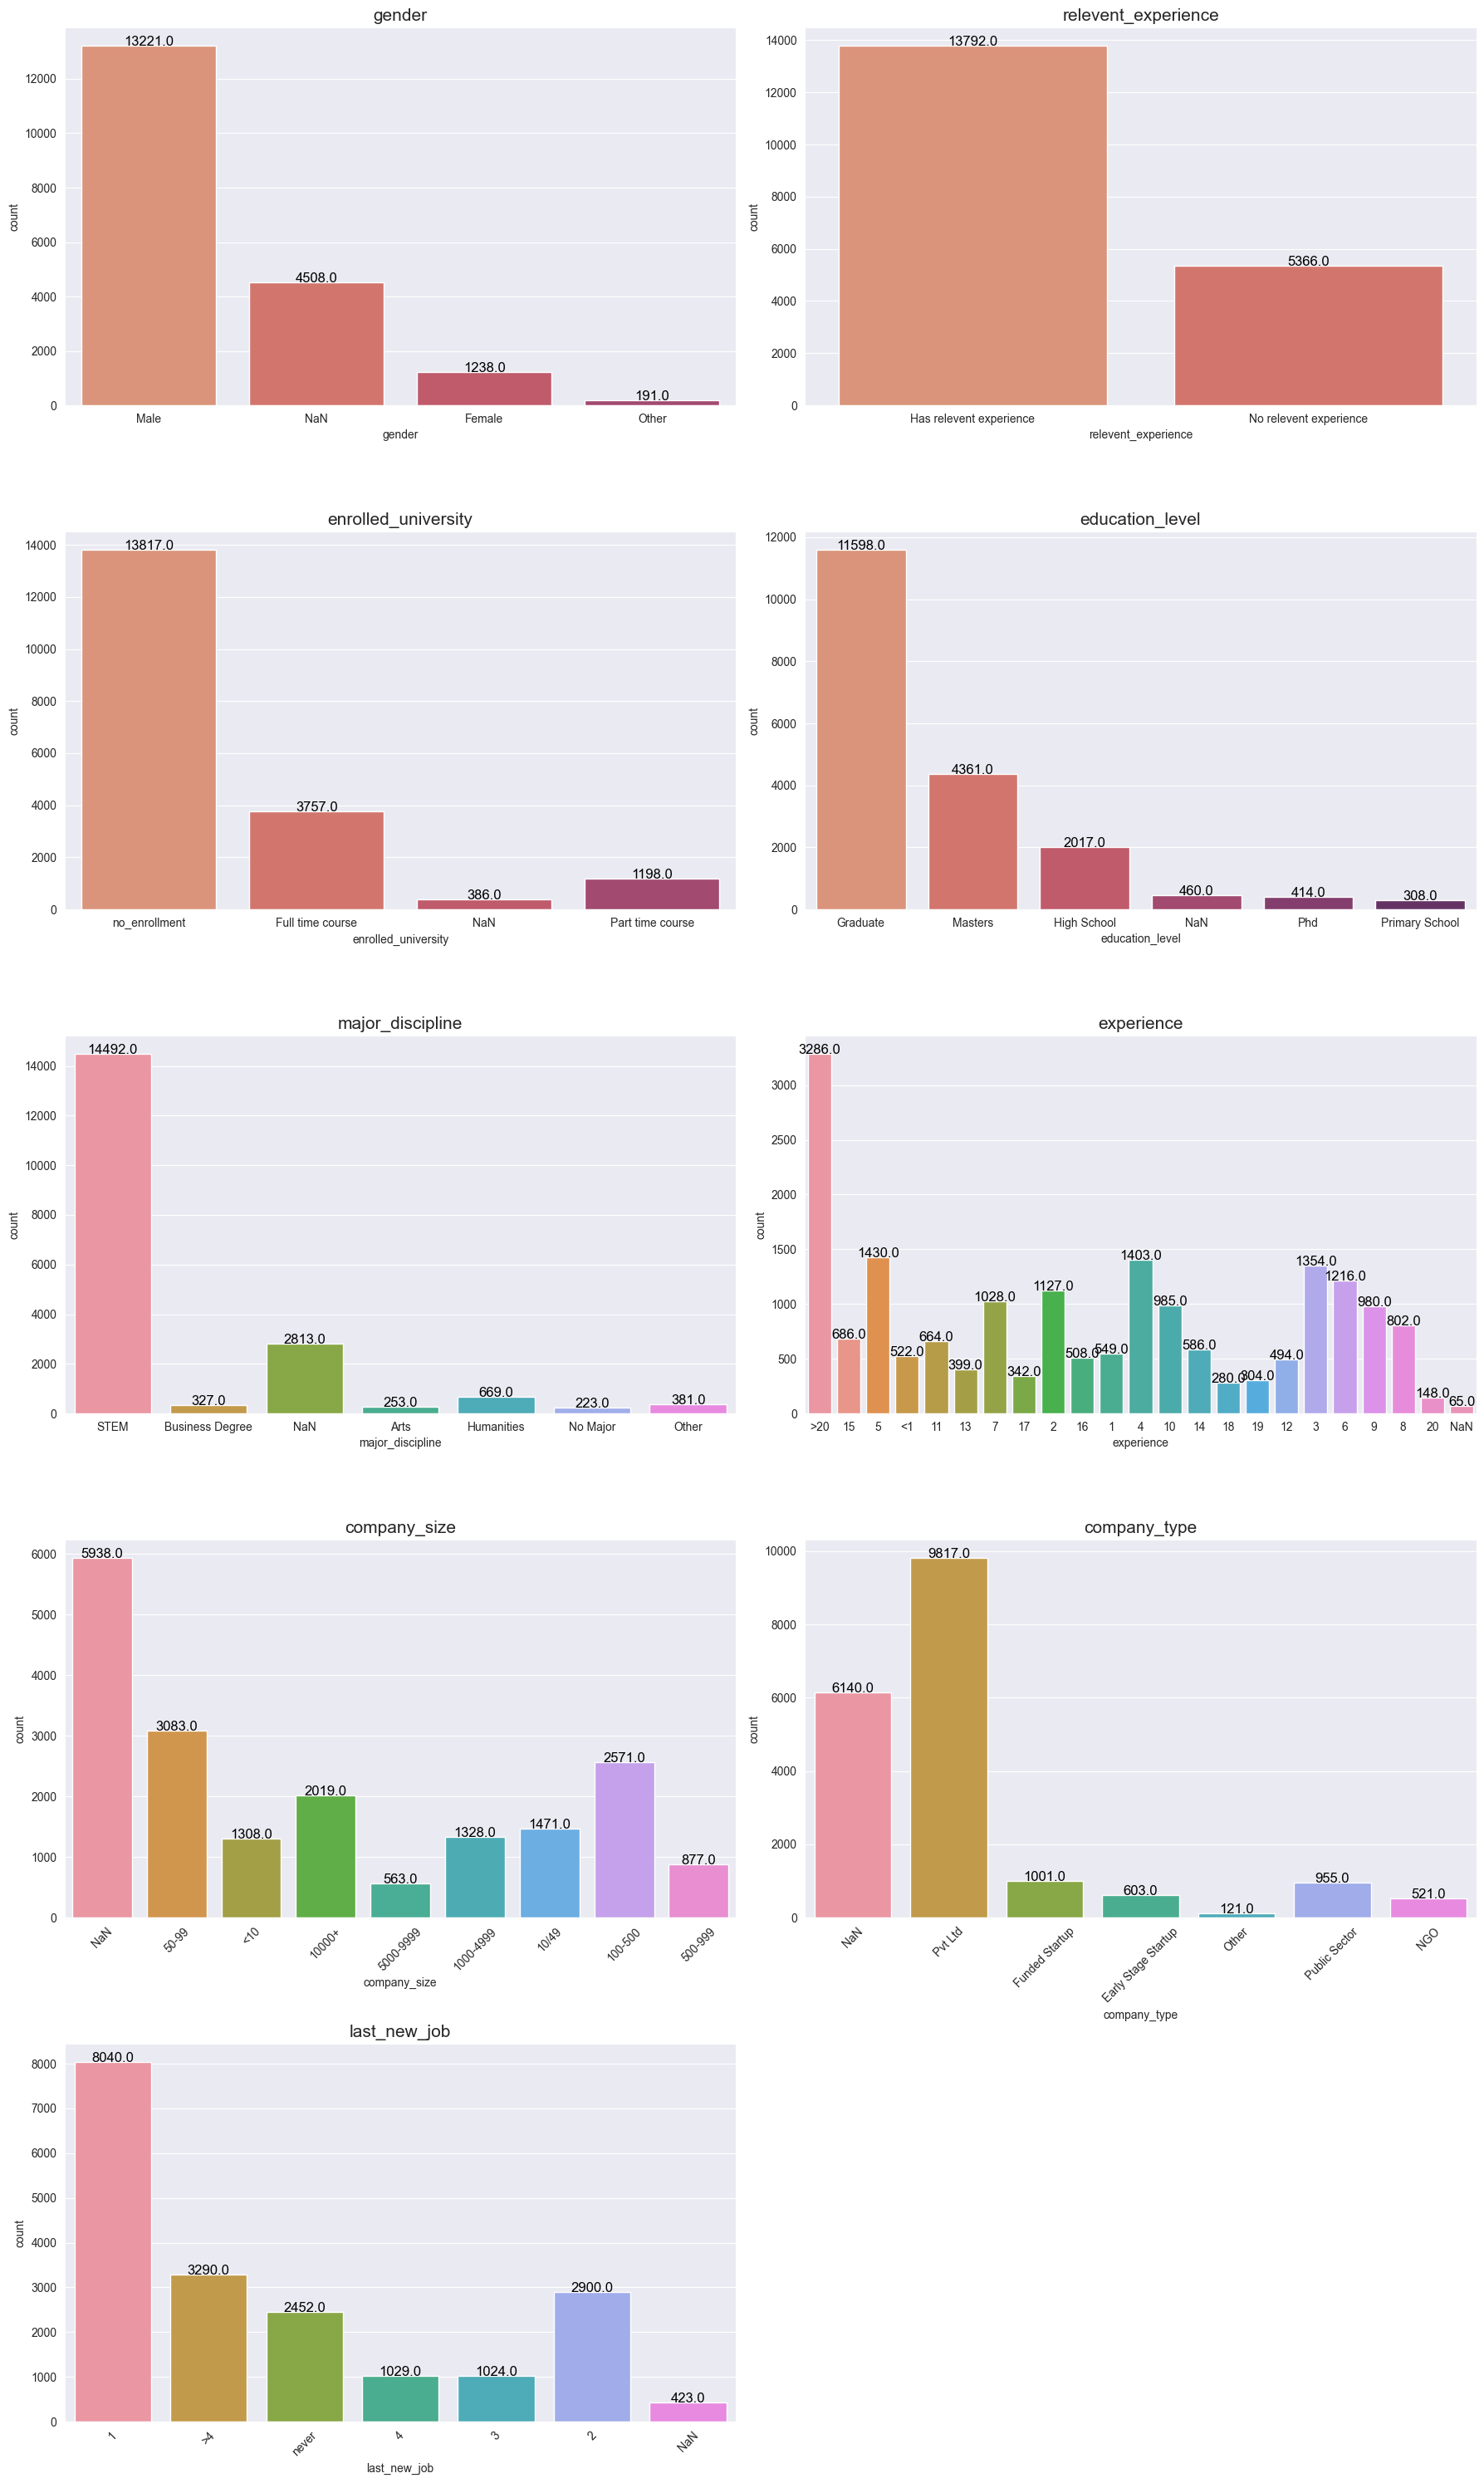

In [14]:
# Plot

#colunas_cat = df.select_dtypes(exclude=['number']).drop.columns
colunas_cat = df.drop(columns=['city']).select_dtypes(include=object)

# Tamanho da figura
plt.figure(figsize = (18,30))

# Contador
A = 0

# Loop
for i in colunas_cat:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)

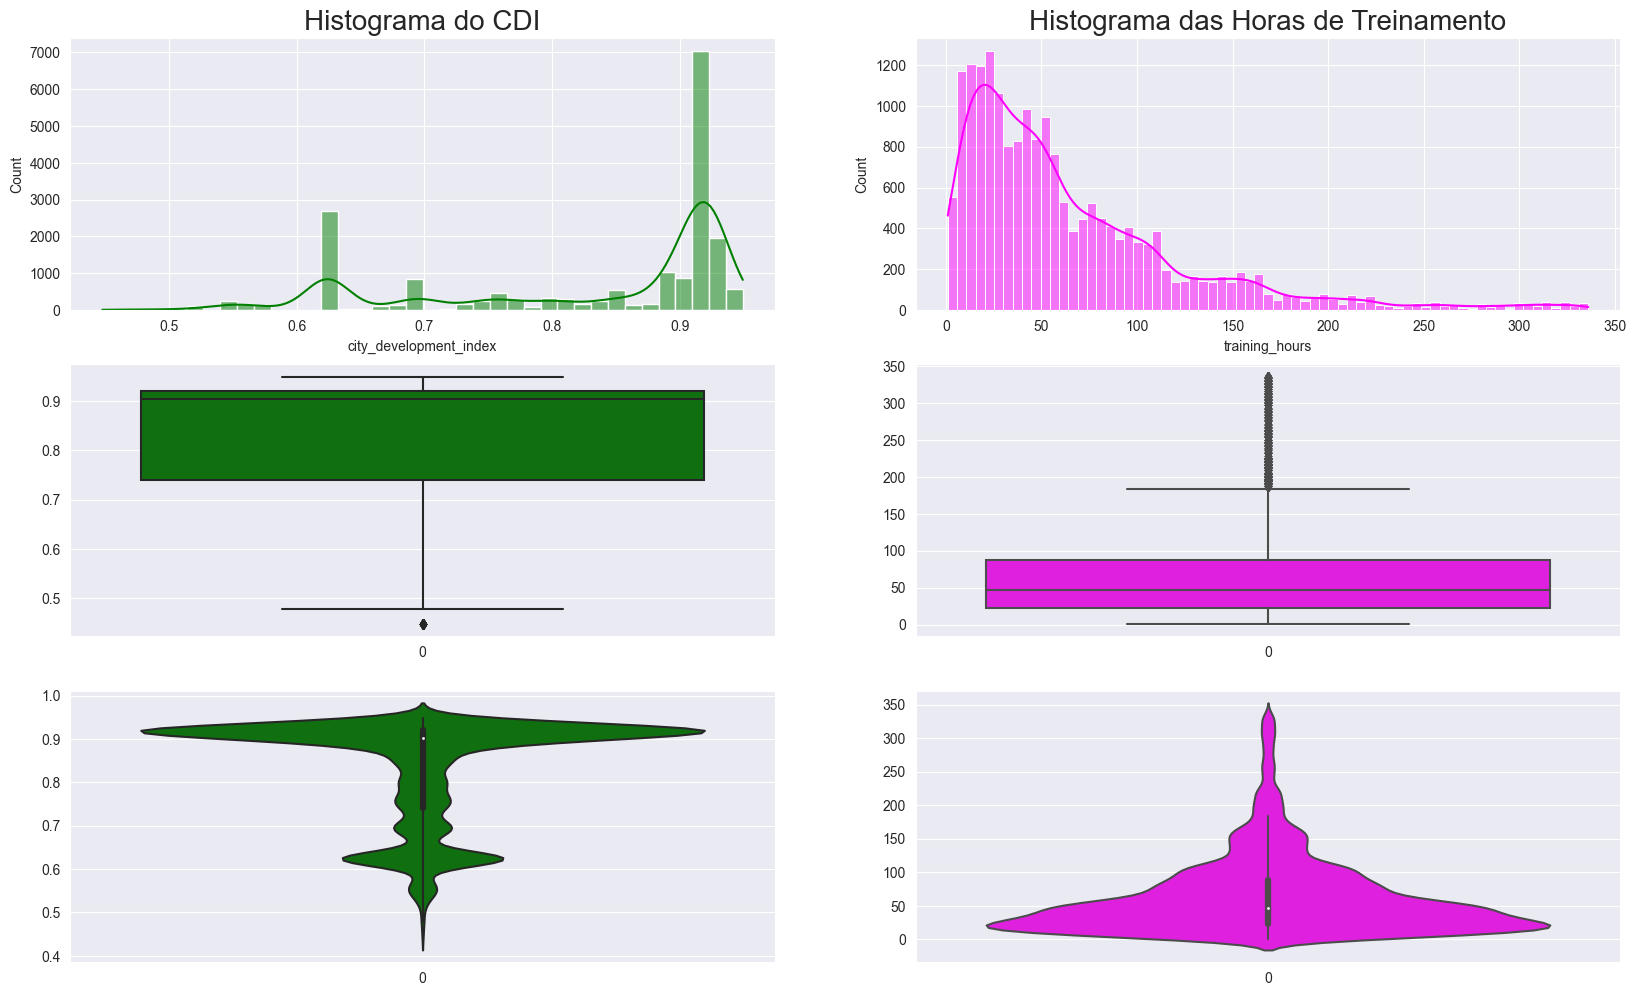

In [15]:
# Figura
plt.figure(figsize = (20,12))

# Subplots com histogramas
plt.subplot(321)
sns.color_palette("hls", 8)
sns.histplot(df['city_development_index'], kde = True, color = "green")
plt.title('Histograma do CDI', fontsize = 20)

plt.subplot(322)
sns.histplot(df['training_hours'], kde = True, color = "magenta")
plt.title('Histograma das Horas de Treinamento', fontsize = 20)

# Subplots com boxplots
plt.subplot(323)
sns.boxplot(df['city_development_index'], color = "green")

plt.subplot(324)
sns.boxplot(df['training_hours'], color = "magenta")

# Subplots com boxplots
plt.subplot(325)
sns.violinplot(df['city_development_index'], color = "green")

plt.subplot(326)
sns.violinplot(df['training_hours'], color = "magenta")

plt.show()

In [16]:
# Filta colunas do tipo categóricos
colunas_cat = df.drop(columns=['city']).select_dtypes(include=object)
colunas_cat.columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

In [17]:
# Teste de Normalidade da Distribuição

def testar_normalidade(df, coluna):
    stats, pval = normaltest(df[coluna])

     # Checar valor-p
    if pval > 0.05:
        print(coluna, ': Distribuição Normal')
    else:
        print(coluna, ': Distribuição Não Normal')

In [18]:
testar_normalidade(df, coluna='city_development_index')

city_development_index : Distribuição Não Normal


In [19]:
testar_normalidade(df, coluna='training_hours')

training_hours : Distribuição Não Normal


Converte a variável experience para numérica

In [20]:
df["experience"].value_counts().index

Index(['>20', '5', '4', '3', '6', '2', '7', '10', '9', '8', '15', '11', '14',
       '1', '<1', '16', '12', '13', '17', '19', '18', '20'],
      dtype='object')

In [21]:
menor_que_1 = df["experience"] == '<1'
maior_que_20 = df["experience"] == '>20'

In [22]:
df.loc[menor_que_1, ["experience"]] = '1'
df.loc[maior_que_20, ["experience"]] = '20'
df["experience"] = df["experience"].astype(float)

In [23]:
df["experience"].head()

0    20.0
1    15.0
2     5.0
3     1.0
4    20.0
Name: experience, dtype: float64

Converte a variável last_new_job para numérica

In [24]:
df["last_new_job"].value_counts().index

Index(['1', '>4', '2', 'never', '4', '3'], dtype='object')

In [25]:
nunca = df["last_new_job"] == 'never'
maior_que_4 = df["last_new_job"] == '>4'

In [26]:
df.loc[nunca, ["last_new_job"]] = '0'
df.loc[maior_que_4, ["last_new_job"]] = '5'
df["last_new_job"] = df["last_new_job"].astype(float)

In [27]:
df["last_new_job"].head()

0    1.0
1    5.0
2    0.0
3    0.0
4    4.0
Name: last_new_job, dtype: float64

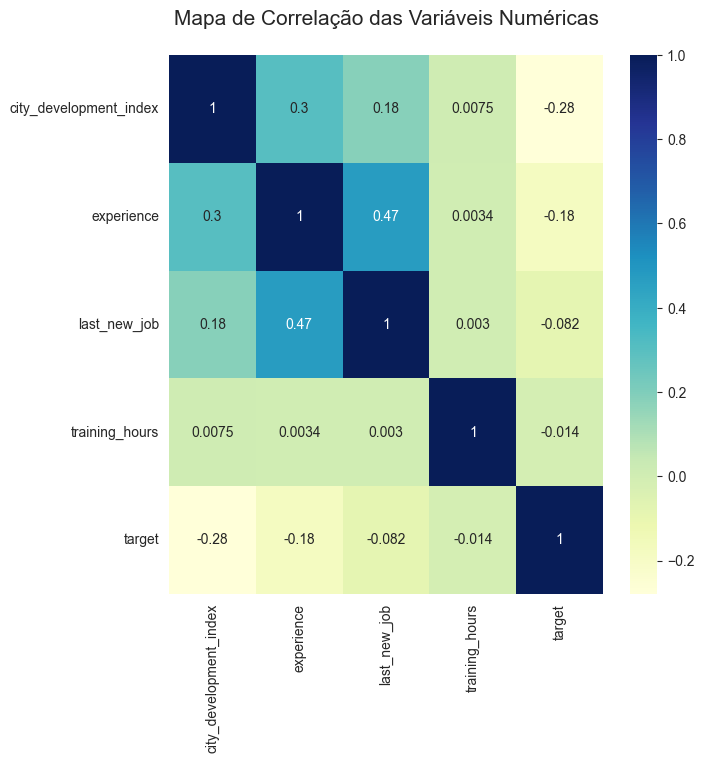

In [28]:
# Mapa de Calor das Correlações
plt.figure(figsize = (7,7))
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
correlacao = df.drop(columns=["enrollee_id"]).select_dtypes(include=np.number).corr("spearman")
sns.heatmap(correlacao, annot = True, cmap = "YlGnBu")
plt.show();

Pela correlação de spearman, last_new_job e experience têm correlação média (0,473), enquanto outros têm correlação fraca.
As variáveis last_new_job e training_hours tem correlação próxima de zero com a variável alvo e poderiam ser descartadas.
Para a relação entre as variáveis categóricas e a variável alvo, usaremos WOE e IV.

### Weight of Evidence (WOE) e Information Value (IV)

Este conjunto de dados contém mais dados com tipo categórico do que tipo numérico. Usaremos recursos categóricos nominais para WOE e IV.

Interpretamos o resultado de IV assim:

    Information Value, Poder de Previsão

    < 0.02, não deve ser usado para previsão
    0.02 - 0.1, preditor fraco
    0.1 - 0.3, preditor médio
    0.3 - 0.5, preditor forte
    > 0.5, parece bom demais para ser verdade

In [29]:
# Loop
for i in df.drop(columns = ['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns:

    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))

    print(df_woe_iv,'\n------------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------------
target                0.0   

In [30]:
colunas_cat = df.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns

In [31]:
iv = []
for i in colunas_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'Features':colunas_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')
df_iv

,iv
Features,
gender,0.003337
major_discipline,0.004148
company_type,0.017772
education_level,0.051170
relevent_experience,0.083523
enrolled_university,0.118886


<Figure size 1000x1200 with 0 Axes>

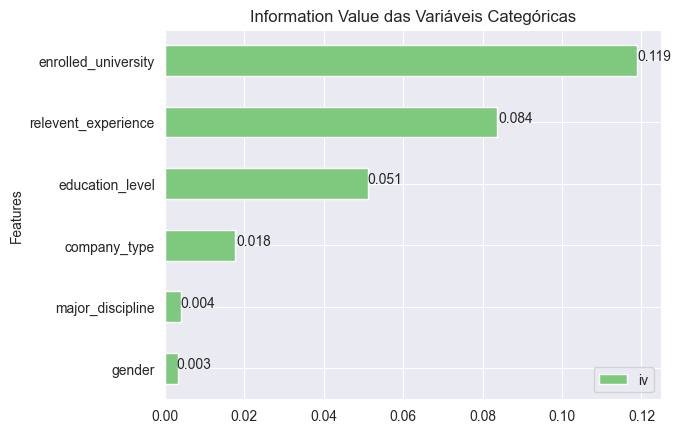

In [32]:
# Plot do Information Value
# Plot
# Figura
plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show();


* No gráfico acima, podemos ver a ordem dos recursos com base em seu poder preditivo em relação ao alvo.
* Com base em seu valor IV, `enrolled_university` é um preditor médio, `relevent_experience` e `education_level` são preditores fracos e os outros são inúteis para a previsão.

In [33]:
def plotar_colunas_valores_ausentes(df):
    # Verificando colunas com valores ausentes
    valores_na = df.isna().sum()
    valores_na = valores_na[valores_na > 0].sort_values()

    if not valores_na.empty:
        # Plotando gráfico de barras para valores ausentes
        #st.markdown('### Valores ausentes por coluna')
        na_fig, na_plot = plt.subplots(figsize=(12, 8))
        na_plot.barh(valores_na.index, valores_na.values)
        na_plot.set_title('Valores ausentes por coluna')
        na_plot.set_xlabel('Quantidade de valores ausentes')
        na_plot.set_ylabel('Colunas')
        plt.show()

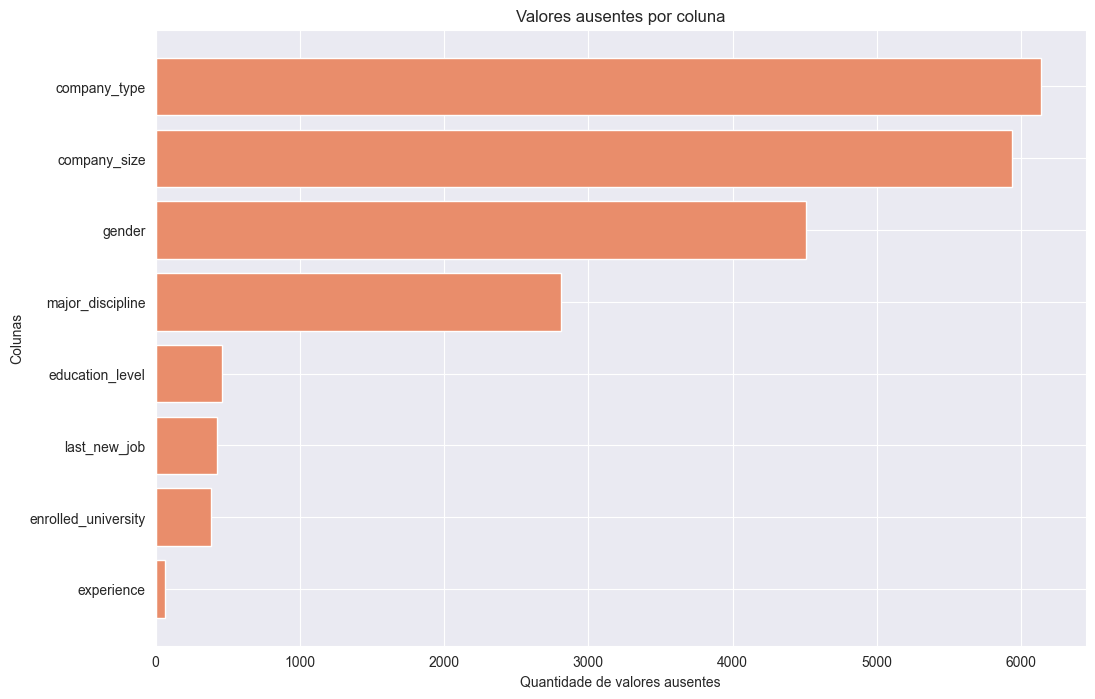

In [34]:
plotar_colunas_valores_ausentes(df)

In [35]:
def plotar_mapa_valores_ausentes(df):
    df_nan = pd.DataFrame(df.isna().sum())

    if df.isna().any(axis = None):
        missingno.matrix(df[df_nan[df_nan[0]>0].index])
        plt.show()

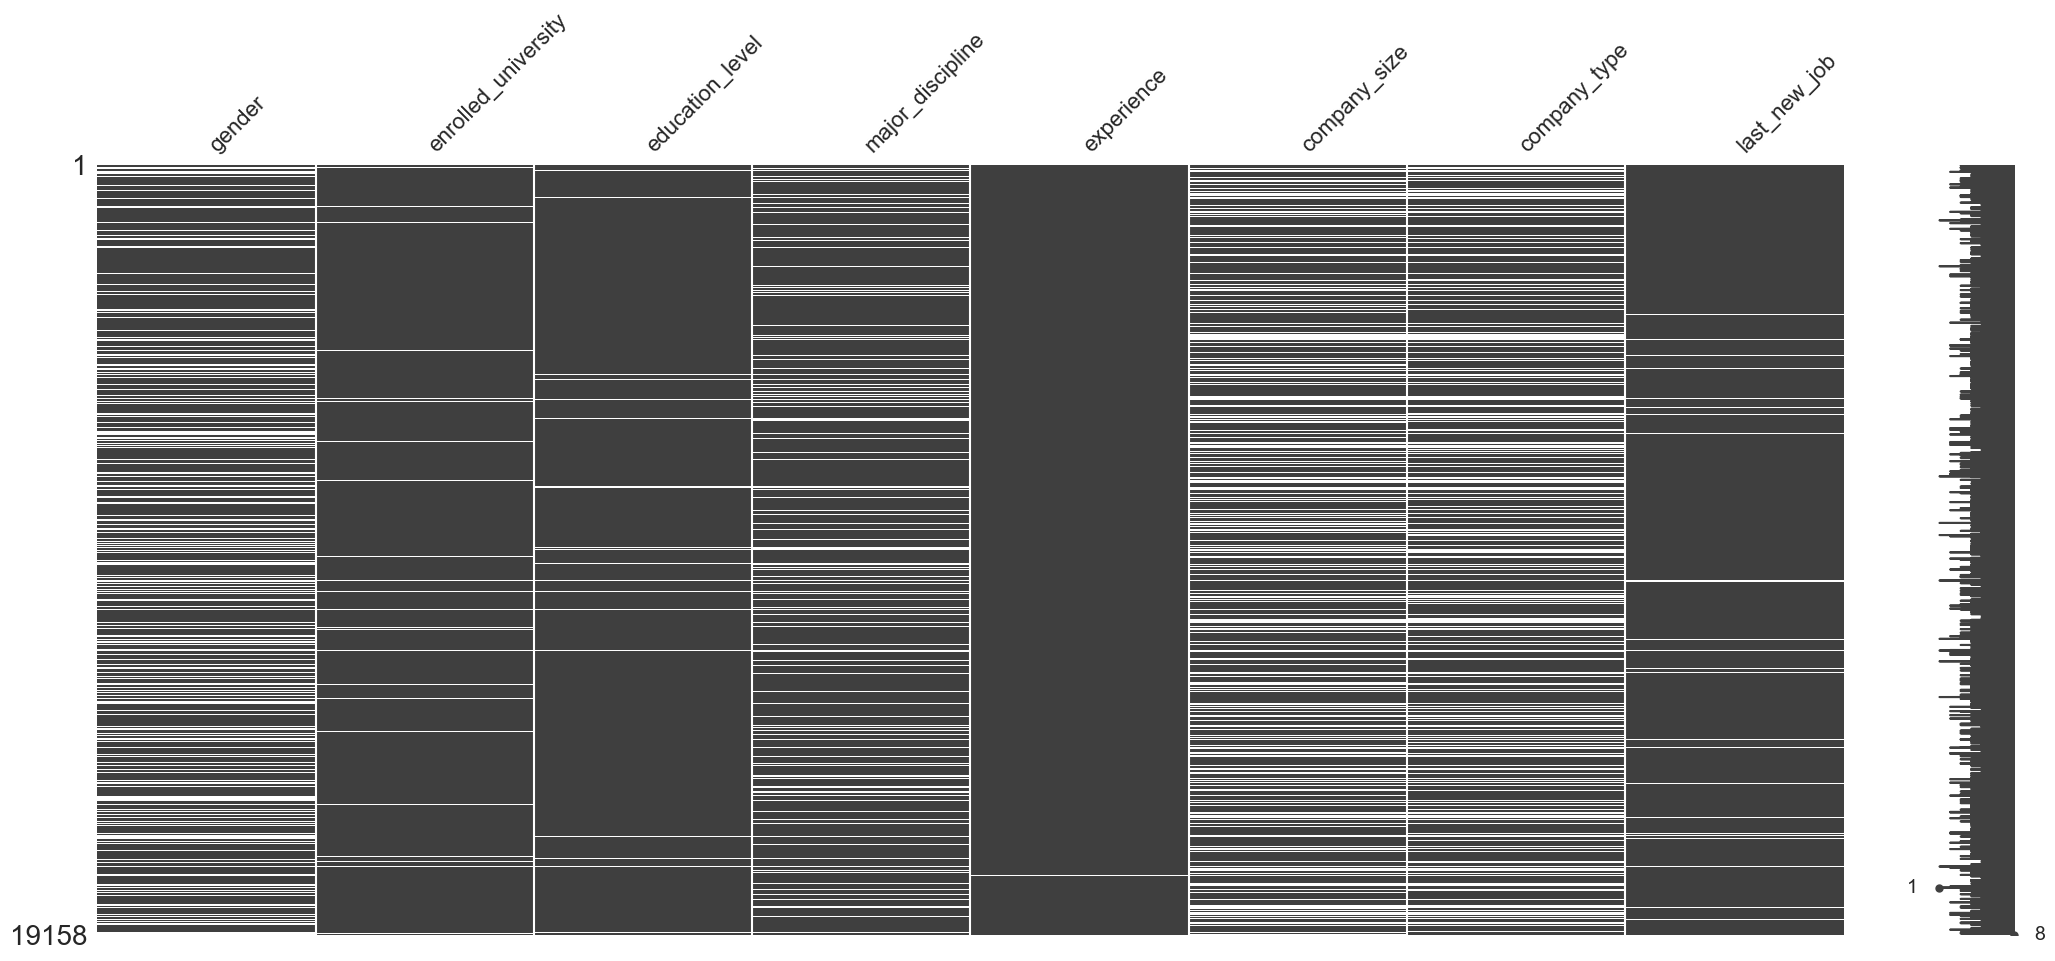

In [36]:
plotar_mapa_valores_ausentes(df)

In [37]:
assert df.duplicated().sum() == 0

In [38]:
def plotar_balanceamento_variavel(df, coluna):
# Figura
    plt.figure(figsize = (17,(100)/20))

    plt.subplot(121)
    plt.pie(round(df[coluna].value_counts() / len(df) * 100, 2),
            labels = list(df[coluna].value_counts().index),
            autopct = "%.2f%%",
            explode = (0,0.1))

    plt.axis("equal")
    plt.title(f"{coluna.capitalize()} Imbalance Ratio", size = 15)

    plt.subplot(122)
    ax = sns.countplot(data = df, x = coluna)
    plt.title(f"Barplot {coluna.capitalize()} Label", fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}',
                    (p.get_x()+0.4,
                     p.get_height()),
                    ha = 'center',
                    va = 'top',
                    color = 'white',
                    size = 12)

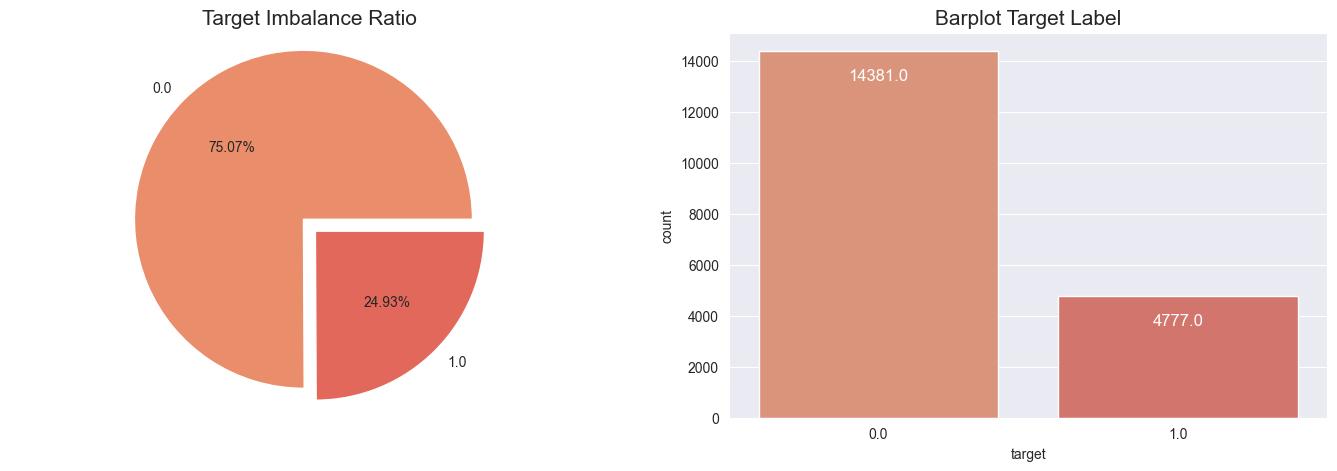

In [39]:
plotar_balanceamento_variavel(df, coluna='target')

Os dados estão desbalanceados em relação a variável target.

In [40]:
#Tratando valores ausentes
df.fillna('Other', inplace=True)

In [41]:
assert df.isna().sum().sum() == 0

---
<a id='conclusion'></a>
## 4. Conclusão


Com base em nossa análise observamos que as variáveis mais relevantes para identificar um bom candidato são:

- Índice de Desenvolvimento da cidade onde mora o candidato.
- Tempo de experiência profissional.
- Se está ou não matriculado em um curso universitário.
- Se tem ou não experiência relevante.
- O nível educacional.
- O tipo de empresa que o candidato trabalhou ou trabalha atualmente.
- A especialização na graduação (quando for o caso).

Não são relevantes para a análise:

- O ID do candidato.
- O código da cidade do candidato.
- O gênero.
- A última vez que o candidato esteve empregado.
- O tamanho da empresa (quando for o caso).
- Total de horas de treimamento.


---
<a id='references'></a>
## Referências

Data Science Academy - Formação Analista de Dados:
https://www.datascienceacademy.com.br/bundle/formacao-analista-de-dados

Data Science Academy - Análise de Dados com Linguagem Python:
https://www.datascienceacademy.com.br/course/analise-de-dados-com-linguagem-python-dsa